In [233]:
import pandas as pd
import statsmodels.api as sm 
import yfinance as yf
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

# 習題五 : 讀取P21.txt中個股收益率 & 3Factors.txt中三因子資料，運用2014年數據建立三因子模型
樣本中Zhongxin、zyhy直接當作報酬率資料

In [234]:
p21 = pd.read_csv('problem21.txt', sep='\t')
p21.index = pd.to_datetime(p21.Date)
p21.drop(['Date'], axis = 1, inplace = True)

# 若把資料當成收盤價，可用以下程式碼轉換資料成報酬率
# p21 = p21.iloc[:].pct_change(1)[1:]*100

p21.columns = ['zhongxin(%)','zyhy(%)']
p21

,zhongxin(%),zyhy(%)
Date,,
2014-01-01,3.87,3.51
2014-01-02,3.86,3.52
2014-01-03,3.80,3.35
2014-01-06,3.74,3.23
2014-01-07,3.73,3.20
...,...,...
2014-12-25,6.98,8.00
2014-12-26,7.33,8.00
2014-12-29,7.28,8.00


In [235]:
# 讀入三因子資料
p21_factor = pd.read_csv('ThreeFactors.txt', sep = '\t')
p21_factor.index = pd.to_datetime(p21_factor.TradingDate)
p21_factor = p21_factor['2014']

# 將年無風險利率轉化成日無風險利率 "Rf(%)"
p21_factor['Rf(%)'] = (1.00755**(1/360)-1)*100
p21_factor

,MarkettypeID,TradingDate,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2,Rf(%)
TradingDate,,,,,,,,,
2014-01-02,P9710,2014/1/2,-0.001081,0.000919,-0.017003,-0.014747,-0.017604,-0.019279,0.002089
2014-01-03,P9710,2014/1/3,-0.010081,-0.009081,-0.008988,-0.005061,-0.013391,-0.015440,0.002089
2014-01-06,P9710,2014/1/6,-0.018081,-0.020081,0.015599,0.015898,0.009912,0.009018,0.002089
2014-01-07,P9710,2014/1/7,0.000919,0.001919,-0.008349,-0.007034,-0.014506,-0.015003,0.002089
2014-01-08,P9710,2014/1/8,-0.000081,0.001919,-0.005764,-0.001121,-0.017683,-0.019687,0.002089
...,...,...,...,...,...,...,...,...,...
2014-12-25,P9710,2014/12/25,0.031926,0.030926,0.026070,0.025457,0.021898,0.023146,0.002089
2014-12-26,P9710,2014/12/26,0.025926,0.022926,0.031856,0.028753,0.010040,0.013752,0.002089
2014-12-29,P9710,2014/12/29,0.000926,-0.001074,0.031346,0.029915,0.024709,0.027496,0.002089


In [236]:
# 合併報酬率、三因子資料
data = pd.concat([ p21[['zhongxin(%)','zyhy(%)']], p21_factor.iloc[:,2:] ], axis=1).dropna()
data['zhongxin(%)'] = data['zhongxin(%)'] - data['Rf(%)']
data['zyhy(%)'] = data['zyhy(%)'] - data['Rf(%)']
data

,zhongxin(%),zyhy(%),RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2,Rf(%)
2014-01-02,3.857911,3.517911,-0.001081,0.000919,-0.017003,-0.014747,-0.017604,-0.019279,0.002089
2014-01-03,3.797911,3.347911,-0.010081,-0.009081,-0.008988,-0.005061,-0.013391,-0.015440,0.002089
2014-01-06,3.737911,3.227911,-0.018081,-0.020081,0.015599,0.015898,0.009912,0.009018,0.002089
2014-01-07,3.727911,3.197911,0.000919,0.001919,-0.008349,-0.007034,-0.014506,-0.015003,0.002089
2014-01-08,3.737911,3.167911,-0.000081,0.001919,-0.005764,-0.001121,-0.017683,-0.019687,0.002089
...,...,...,...,...,...,...,...,...,...
2014-12-25,6.977911,7.997911,0.031926,0.030926,0.026070,0.025457,0.021898,0.023146,0.002089
2014-12-26,7.327911,7.997911,0.025926,0.022926,0.031856,0.028753,0.010040,0.013752,0.002089
2014-12-29,7.277911,7.997911,0.000926,-0.001074,0.031346,0.029915,0.024709,0.027496,0.002089
2014-12-30,8.007911,7.997911,-0.001074,-0.002074,0.019457,0.017620,0.020456,0.019708,0.002089


## FF三因子模型
<img src="https://cdn.corporatefinanceinstitute.com/assets/fama-french-three-factor-model02.png" width="50%">

### 丟入模型 : zhongxin

In [237]:
print('zhongxin :')
regThrFac = sm.OLS(data['zhongxin(%)'], sm.add_constant( data[['RiskPremium1', 'SMB1', 'HML1']] ))
result = regThrFac.fit()
print(result.summary())

zhongxin :
                            OLS Regression Results                            
Dep. Variable:            zhongxin(%)   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     21.80
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.58e-12
Time:                        00:16:30   Log-Likelihood:                -267.62
No. Observations:                 245   AIC:                             543.2
Df Residuals:                     241   BIC:                             557.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6883      0.047   

C:\Users\sandy\Anaconda3\envs\Quantative\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [238]:
#利用params提取模型係數
print('zhongxin :')
result.params

zhongxin :


const            4.688289
RiskPremium1     8.930754
SMB1            37.998006
HML1           -16.489443
dtype: float64

### 丟入模型 : zyhy

In [239]:
print('zyhy :')
regThrFac = sm.OLS(data['zyhy(%)'], sm.add_constant( data[['RiskPremium2', 'SMB2', 'HML2']] ))
result = regThrFac.fit()
print(result.summary())

zyhy :
                            OLS Regression Results                            
Dep. Variable:                zyhy(%)   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     12.60
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.11e-07
Time:                        00:16:31   Log-Likelihood:                -367.42
No. Observations:                 245   AIC:                             742.8
Df Residuals:                     241   BIC:                             756.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7459      0.071     53

C:\Users\sandy\Anaconda3\envs\Quantative\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [240]:
#利用params提取模型係數
print('zyhy :')
result.params

zyhy :


const            3.745909
RiskPremium2    15.225575
SMB2            39.796687
HML2           -10.884756
dtype: float64

# 習題六 : 讀取宏達電(2498)的2014年資料
df_2498、p21_factor
## (a) CAPM模型
<img src="https://i.imgur.com/Lyj6a93.png" width="50%">
"ROI" 欄位 改名成 "宏達電(%)"

In [241]:
# 讀取2498宏達電的報酬率資料
df_2498 = pd.read_csv('2498.csv', sep=',')
df_2498.index = pd.to_datetime(df_2498.Date)
df_2498.rename(columns={'ROI':'宏達電(%)'}, inplace = True)
df_2498

,Date,Close,Open,High,Low,Volume,宏達電(%)
Date,,,,,,,
2014-01-02,2014/1/2,137.58,140.56,141.06,137.09,7964,-1.7730
2014-01-03,2014/1/3,137.58,137.58,140.07,137.09,6599,0.0000
2014-01-06,2014/1/6,132.62,137.58,138.58,132.12,14005,-3.6101
2014-01-07,2014/1/7,130.13,131.62,132.62,128.64,13705,-1.8727
2014-01-08,2014/1/8,129.14,130.13,131.62,129.14,7623,-0.7634
...,...,...,...,...,...,...,...
2014-12-26,2014/12/26,136.59,135.10,137.09,135.10,7532,1.8519
2014-12-27,2014/12/27,136.59,136.59,137.09,135.60,2560,0.0000
2014-12-29,2014/12/29,136.59,136.59,137.58,135.60,3866,0.0000


In [242]:
# 從 yfinance 抓大盤指數報酬率 (%)
TWII = yf.Ticker('^TWII').history(period='1d', start='2013-12-31', end='2015-01-01')
TWII = pd.DataFrame(TWII.iloc[:, 3].pct_change(1)[1:]*100)
TWII.rename(columns={'Close':'Rm(%)'}, inplace = True)
TWII['Rf(%)'] = (1.00755**(1/360)-1)*100
TWII

,Rm(%),Rf(%)
Date,,
2014-01-02,0.011964,0.002089
2014-01-03,-0.766328,0.002089
2014-01-06,-0.544437,0.002089
2014-01-07,0.144589,0.002089
2014-01-08,0.513494,0.002089
...,...,...
2014-12-25,-0.299141,0.002089
2014-12-26,0.604566,0.002089
2014-12-29,0.783696,0.002089


In [243]:
# 合併 2498宏達電報酬率、大盤報酬率，並刪除含有空值的列
data = pd.concat([df_2498['宏達電(%)'], TWII], axis = 1)
# 將大盤報酬率 - Rf，變成大盤的超額報酬率
data['Rm(%)'] = data['Rm(%)'] - data['Rf(%)']
data.dropna(axis=0, how='any', inplace=True)
data

,宏達電(%),Rm(%),Rf(%)
Date,,,
2014-01-02,-1.7730,0.009875,0.002089
2014-01-03,0.0000,-0.768417,0.002089
2014-01-06,-3.6101,-0.546526,0.002089
2014-01-07,-1.8727,0.142500,0.002089
2014-01-08,-0.7634,0.511405,0.002089
...,...,...,...
2014-12-25,1.1236,-0.301230,0.002089
2014-12-26,1.8519,0.602476,0.002089
2014-12-29,0.0000,0.781607,0.002089


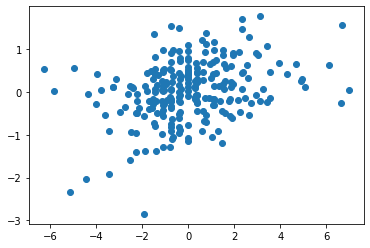

In [244]:
plt.scatter(data['宏達電(%)'], data['Rm(%)'])

In [245]:
print('2498 宏達電 :')
regThrFac = sm.OLS(data['宏達電(%)'], sm.add_constant( data[['Rm(%)']] ))
result = regThrFac.fit()
c_CAPM = result.params
print(c_CAPM, '\n', result.summary())

2498 宏達電 :
const   -0.006477
Rm(%)    0.963129
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                 宏達電(%)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     28.27
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.37e-07
Time:                        00:16:31   Log-Likelihood:                -516.19
No. Observations:                 247   AIC:                             1036.
Df Residuals:                     245   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

C:\Users\sandy\Anaconda3\envs\Quantative\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## (b) 三因子模型
三因子選擇 RiskPremium1, SMB1, HML1

In [246]:
# 合併資料，並把宏達電收益率 - Rf，變成宏達電的超額報酬率
data = pd.concat([ df_2498[['宏達電(%)']], p21_factor.iloc[:,2:] ], axis=1).dropna()
data['宏達電(%)'] = data['宏達電(%)'] - data['Rf(%)']
data.drop(['RiskPremium2', 'SMB2', 'HML2'], axis = 1, inplace = True)
data

,宏達電(%),RiskPremium1,SMB1,HML1,Rf(%)
2014-01-02,-1.775089,-0.001081,-0.017003,-0.017604,0.002089
2014-01-03,-0.002089,-0.010081,-0.008988,-0.013391,0.002089
2014-01-06,-3.612189,-0.018081,0.015599,0.009912,0.002089
2014-01-07,-1.874789,0.000919,-0.008349,-0.014506,0.002089
2014-01-08,-0.765489,-0.000081,-0.005764,-0.017683,0.002089
...,...,...,...,...,...
2014-12-25,1.121511,0.031926,0.026070,0.021898,0.002089
2014-12-26,1.849811,0.025926,0.031856,0.010040,0.002089
2014-12-29,-0.002089,0.000926,0.031346,0.024709,0.002089
2014-12-30,2.179711,-0.001074,0.019457,0.020456,0.002089


In [247]:
print('2498宏達電 :')
regThrFac = sm.OLS(data['宏達電(%)'], sm.add_constant( data[['RiskPremium1', 'SMB1', 'HML1']] ))
result = regThrFac.fit()
c_FF = result.params
print(c_FF, '\n', result.summary())

2498宏達電 :
const           -0.014300
RiskPremium1    25.591843
SMB1            -9.377063
HML1             5.750316
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                 宏達電(%)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.473
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.223
Time:                        00:16:31   Log-Likelihood:                -506.48
No. Observations:                 238   AIC:                             1021.
Df Residuals:                     234   BIC:                             1035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975

C:\Users\sandy\Anaconda3\envs\Quantative\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 結論 :
2498 宏達電 CAPM模型:
<img src="https://i.imgur.com/wlYWMEE.png" width="70%">
2498 宏達電 FF三因子模型:
<img src="https://i.imgur.com/qi6JZhA.png" width="100%">

## (c) 分別使用CAPM、三因子模型估計2015年1月的收益率，比較結果

In [248]:
factor_2015 = pd.read_csv('ThreeFactors.txt', sep = '\t')
factor_2015.index = pd.to_datetime(factor_2015.TradingDate)
factor_2015 = factor_2015['2015-01']
factor_2015['Rf(%)'] = (1.00755**(1/360)-1)*100
factor_2015

,MarkettypeID,TradingDate,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2,Rf(%)
TradingDate,,,,,,,,,
2015-01-05,P9710,2015/1/5,0.033926,0.030926,0.037147,0.032969,0.033216,0.036105,0.002089
2015-01-06,P9710,2015/1/6,0.002926,0.004926,-0.021998,-0.018519,-0.023558,-0.025566,0.002089
2015-01-07,P9710,2015/1/7,0.002926,0.002926,0.007548,0.006314,0.005183,0.005311,0.002089
2015-01-08,P9710,2015/1/8,-0.022074,-0.019074,-0.025485,-0.022480,-0.029721,-0.031789,0.002089
2015-01-09,P9710,2015/1/9,-0.002074,-0.002074,0.007416,0.007961,0.002365,0.001750,0.002089
...,...,...,...,...,...,...,...,...,...
2015-01-26,P9710,2015/1/26,0.014926,0.030926,-0.005828,0.012178,-0.017902,-0.017051,0.002089
2015-01-27,P9710,2015/1/27,-0.008074,-0.007074,-0.019286,-0.016821,-0.023302,-0.024304,0.002089
2015-01-28,P9710,2015/1/28,-0.013074,-0.012074,-0.016096,-0.014574,-0.006388,-0.007847,0.002089


In [249]:
# 2015/01大盤指數報酬率
TWII = yf.Ticker('^TWII').history(period='1d', start='2014-12-31', end='2015-02-01')
TWII = pd.DataFrame(TWII.iloc[:, 3].pct_change(1)[1:]*100)
TWII.rename(columns={'Close':'Rm(%)'}, inplace = True)
TWII

,Rm(%)
Date,
2015-01-05,-0.356169
2015-01-06,-2.434417
2015-01-07,0.350884
2015-01-08,1.739423
2015-01-09,-0.243020
...,...
2015-01-26,0.071054
2015-01-27,0.463406
2015-01-28,-0.112061


In [250]:
# 合併整理出2015/01需要的資料
data_2015 = pd.concat([factor_2015[['RiskPremium1','SMB1','HML1','Rf(%)']] , TWII['Rm(%)']], axis=1)
data_2015

,RiskPremium1,SMB1,HML1,Rf(%),Rm(%)
2015-01-05,0.033926,0.037147,0.033216,0.002089,-0.356169
2015-01-06,0.002926,-0.021998,-0.023558,0.002089,-2.434417
2015-01-07,0.002926,0.007548,0.005183,0.002089,0.350884
2015-01-08,-0.022074,-0.025485,-0.029721,0.002089,1.739423
2015-01-09,-0.002074,0.007416,0.002365,0.002089,-0.243020
...,...,...,...,...,...
2015-01-26,0.014926,-0.005828,-0.017902,0.002089,0.071054
2015-01-27,-0.008074,-0.019286,-0.023302,0.002089,0.463406
2015-01-28,-0.013074,-0.016096,-0.006388,0.002089,-0.112061
2015-01-29,-0.012074,-0.008964,-0.008984,0.002089,-0.883394


### 利用前面迴歸出的公式 :
2498 宏達電 CAPM模型:
<img src="https://i.imgur.com/1uHVM4Y.png" width="70%">
2498 宏達電 FF三因子模型:
<img src="https://i.imgur.com/qi6JZhA.png" width="100%">

In [251]:
# CAPM模型
y_CAPM = c_CAPM['const'] \
     + c_CAPM['Rm(%)'] * ( data_2015['Rm(%)'] - data_2015['Rf(%)'] ) 
print('Expected Return(%)')
y_CAPM

Expected Return(%)


2015-01-05   -0.351526
2015-01-06   -2.353146
2015-01-07    0.329457
2015-01-08    1.666798
2015-01-09   -0.242549
                ...   
2015-01-26    0.059945
2015-01-27    0.437830
2015-01-28   -0.116419
2015-01-29   -0.859312
2015-01-30   -0.672485
Length: 20, dtype: float64

In [252]:
# FF三因子模型
y_FF = c_FF['const'] \
     + c_FF['RiskPremium1'] * data_2015['RiskPremium1'] \
     + c_FF['SMB1'] * data_2015['SMB1'] \
     + c_FF['HML1'] * data_2015['HML1']
print('Expected Return(%)')
y_FF

Expected Return(%)


2015-01-05    0.696602
2015-01-06    0.131392
2015-01-07    0.019608
2015-01-08   -0.511145
2015-01-09   -0.123318
                ...   
2015-01-26    0.319391
2015-01-27   -0.174076
2015-01-28   -0.234688
2015-01-29   -0.290901
2015-01-30   -0.323512
Length: 20, dtype: float64

### 預測結果 (%)

In [254]:
# 合併
predict = pd.concat([y_CAPM, y_FF], axis=1)
predict.columns=['CAPM', 'FF']
pd.set_option('display.max_rows', None)
predict

,CAPM,FF
2015-01-05,-0.351526,0.696602
2015-01-06,-2.353146,0.131392
2015-01-07,0.329457,0.019608
2015-01-08,1.666798,-0.511145
2015-01-09,-0.242549,-0.123318
2015-01-12,-0.398111,-0.577380
2015-01-13,0.552917,0.170142
2015-01-14,-0.546501,-0.060414
2015-01-15,-0.167336,0.699403
2015-01-16,-0.290121,0.242745
